# HW7

Daugiamačių duomenų analizė ir vizualizavimas: tiesinės ir netiesinės projekcijos

- Raskite daugiamačių duomenų pagrindines komponentes (Matlab: pca, R: princomp, ar kt. priemonėm).
- Atvaizduokite duomenų projekciją į dvi pirmasias pagrindines komponentes.
- Atvaizduokite atributų ašis (Matlab/R/Pyhon/kt: biplot())
- Pagal trumpiausias/ilgiausias ašis išrinkite galimai neinformatyviausius/informatyviausius atributus.
- Sudarykite skirtingus atributų poaibius (tik informatyvūs, tik neinformatyvūs, be neinformatyvių artibutų ir pan.) ir vizualizuokite duomenis  netiesinių projekcijų metodu - MDS
- Pristatykite skirtingas vizualizacijas, pakomentuokite gautą rezultatą.
--------------------------------------------------------------------------------------------
Multidimensional data: projections:

- Find principal components of your data (use: Matlab: pca, R: princomp, or other).

- Make visualizations in two projection.

- Make the attribute axis representation.

-  Select the most informative/informative attributes possible according to the shortest / longest axes

-  Create different subsets of attributes (informative only, non-informative only, no non-informative attributies, etc.) and visualize the data using the nonlinear projection method - MDS

- Present different visualizations, comment on the result.

In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
import numpy as np

In [4]:
import plotly.express as px

In [5]:
import plotly.io as pio
pio.renderers.default = "png"

In [6]:
# https://plotly.com/python/pca-visualization/?fbclid=IwAR0x20qTopbBgiVQYoY2sZnb5d72NGfx9DftwAW9ZqNLoW62D_wMLe2mAGo
# https://plotly.com/python/figure-labels/

In [7]:
rinkinys = pd.read_csv("rinkinys.csv")
rinkinys['Price_Tomans'] = rinkinys.Price_Tomans.astype(float)
nrinkinys = pd.DataFrame(rinkinys)
nrinkinys.dropna(inplace=True)
nr2 = nrinkinys.drop_duplicates(subset = ['Address'],keep = 'last').reset_index(drop = True)
nr2.sort_values("Address", inplace = True) 
nr2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price_Tomans,Price_USD
149,72,2,Yra,Yra,Yra,Abazar,3.350000e+09,111666.67
9,90,2,Yra,Yra,Yra,Abbasabad,4.000000e+09,133333.33
31,500,2,Yra,Yra,Nera,Absard,3.100000e+09,103333.33
96,85,2,Yra,Nera,Yra,Abuzar,2.715000e+09,90500.00
132,66,2,Nera,Yra,Nera,Afsarieh,1.120000e+09,37333.33


In [8]:
features = ['Area', 'Room', 'Price_Tomans', 'Price_USD']
X = nr2[features]
X

,Area,Room,Price_Tomans,Price_USD
149,72,2,3.350000e+09,111666.67
9,90,2,4.000000e+09,133333.33
31,500,2,3.100000e+09,103333.33
96,85,2,2.715000e+09,90500.00
132,66,2,1.120000e+09,37333.33
...,...,...,...,...
157,148,3,8.140000e+09,271333.33
87,110,2,5.700000e+09,190000.00
44,250,4,1.875000e+10,625000.00
105,98,2,5.800000e+09,193333.33


### Duomenų projekcija

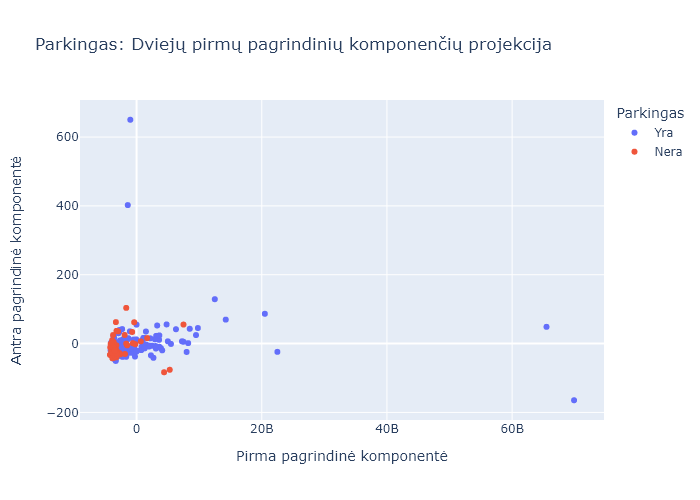

In [9]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=nr2["Parking"], 
                 title = "Parkingas: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Parkingas", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 })
fig.show()


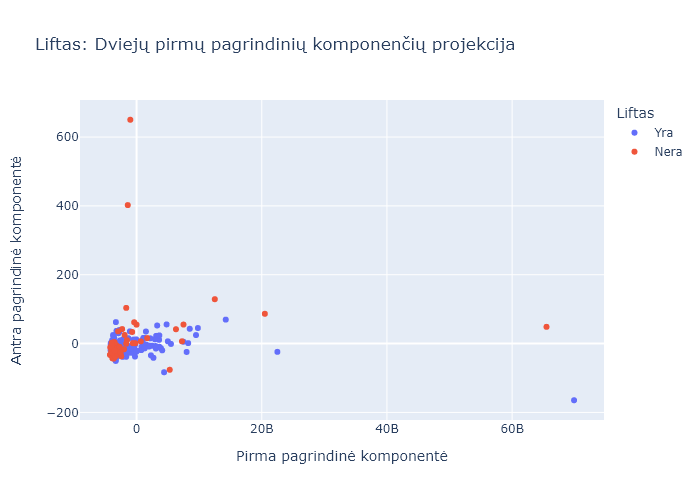

In [10]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=nr2["Elevator"], 
                 title = "Liftas: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Liftas", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 })
fig.show()

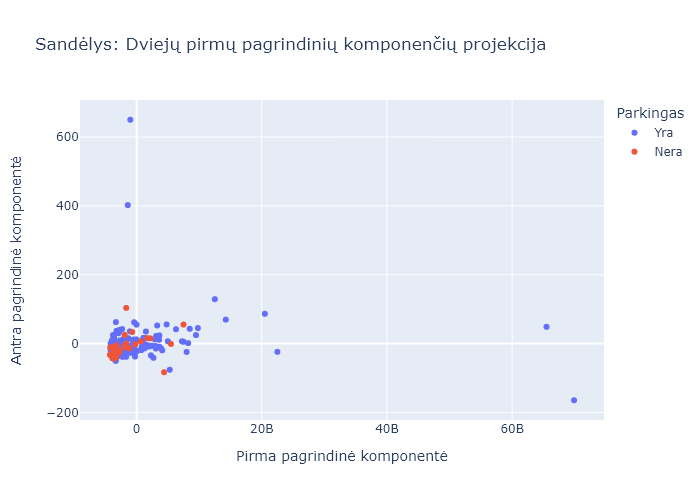

In [11]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=nr2["Warehouse"], 
                 title = "Sandėlys: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Parkingas", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 })
fig.show()

### Atributų ašys

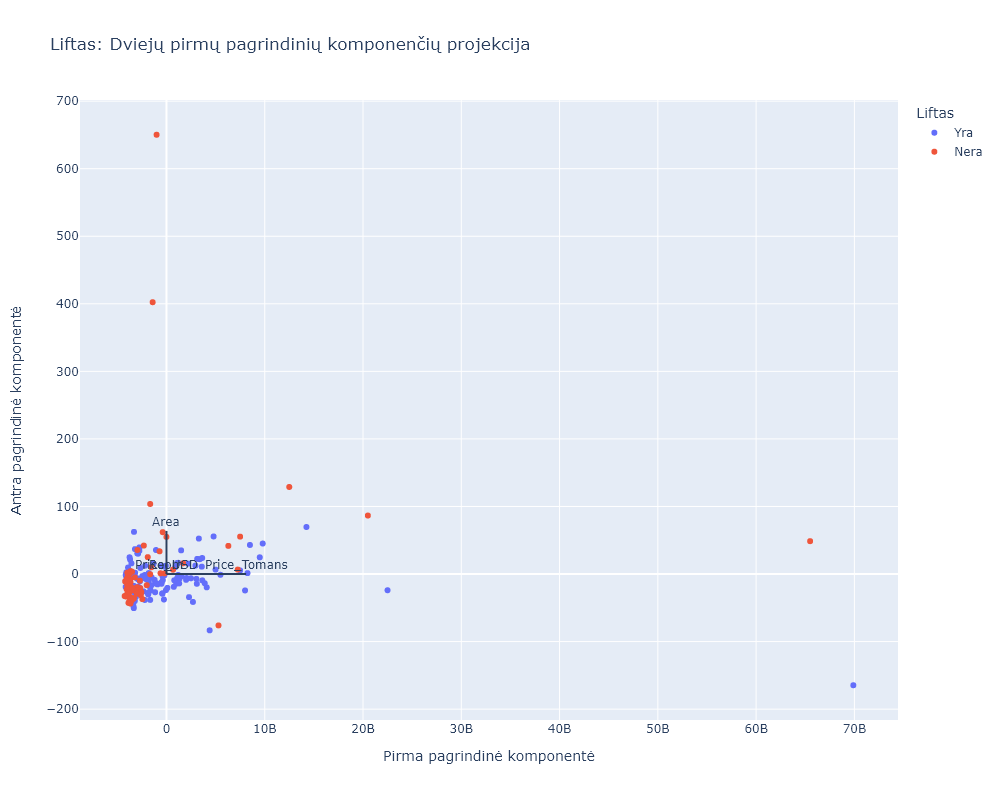

In [12]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=nr2["Elevator"], 
                 title = "Liftas: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Liftas", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 }, height=800, width=1000)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

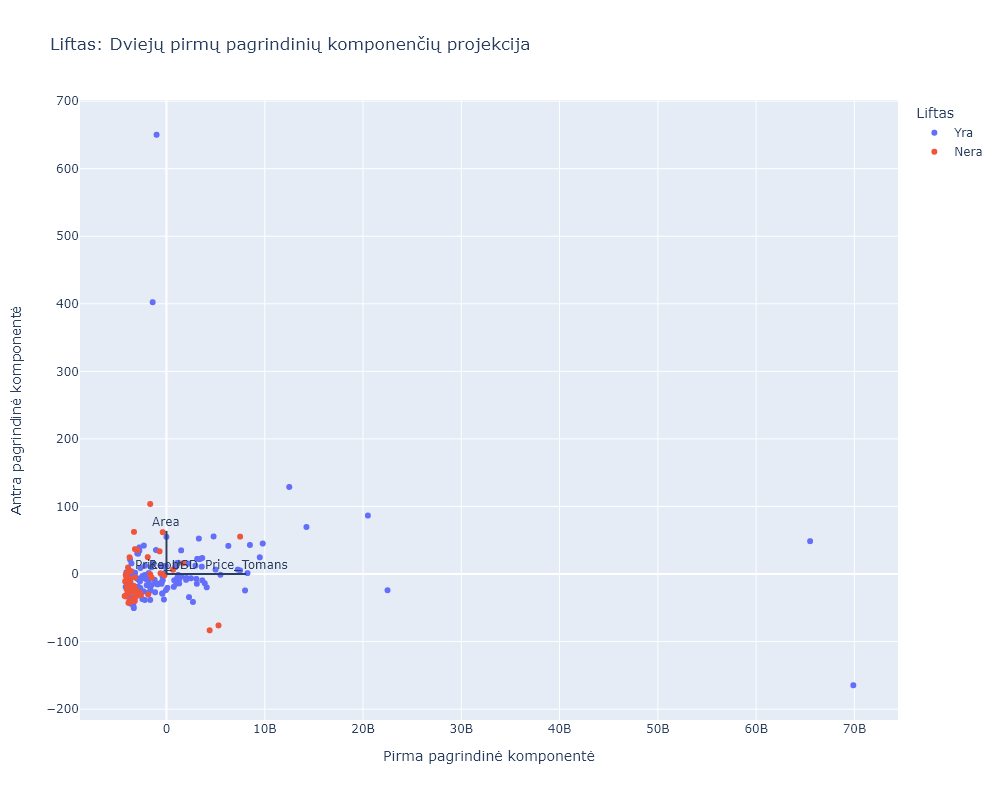

In [13]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=nr2["Parking"], 
                 title = "Liftas: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Liftas", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 }, height=800, width=1000)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

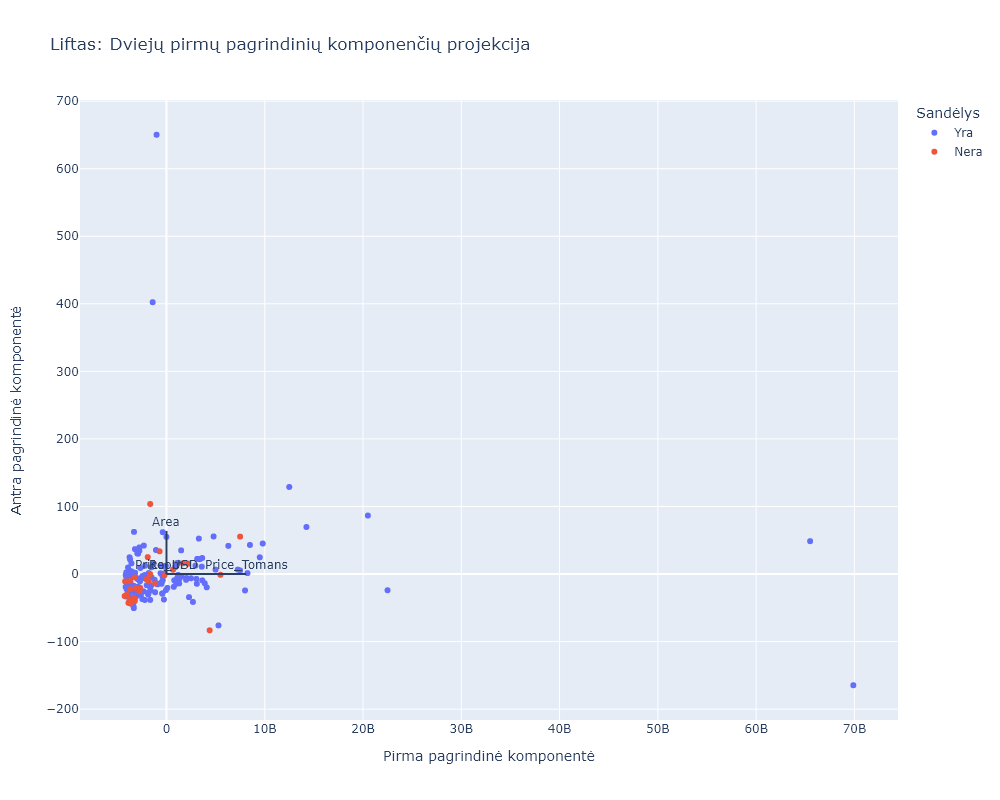

In [14]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=nr2["Warehouse"], 
                 title = "Liftas: Dviejų pirmų pagrindinių komponenčių projekcija",
                labels={
                    "color": "Sandėlys", 
                    "0": "Pirma pagrindinė komponentė", 
                    "1": "Antra pagrindinė komponentė"
                 }, height=800, width=1000)

for i, feature in enumerate(features):
    fig.add_shape(
          type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

### Atributai

#### Informatyviausi atributai: 

- Price_Tomans - kaina Tomanais
- Area - plotas kvadratiniais metrais

#### Mažiau informatyvūs:

- Price_USD - kaina JAV doleriais
- Room - kambarių skaičius